# Visualizing Data

#### Data visualization has gained even more importance today. Data visualization provides insights which one might not get from  numerical analysis

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("/Users/Dippies/CODE PACKT - EML/Chapter 1")
os.getcwd()

housepricesdata = pd.read_csv("HousePrices.csv")

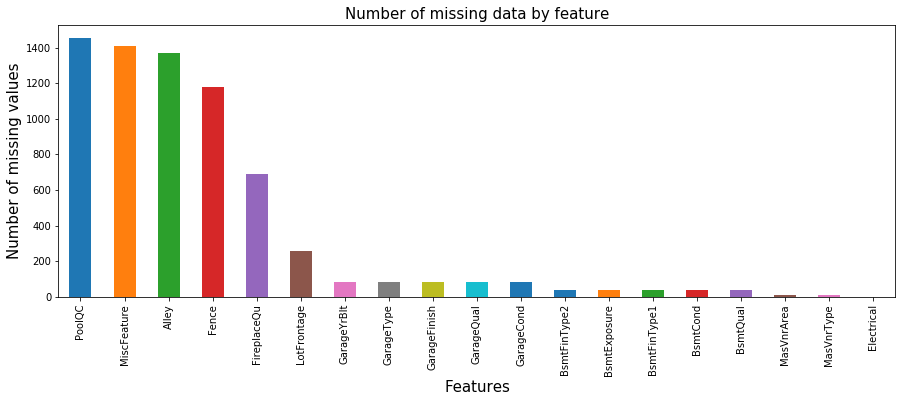

In [6]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= housepricesdata.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [7]:
# Setting options to display all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Treat Missing Values and Perform Type Casting

In [8]:
# Using astype() to cast a pandas object to a specified datatype
housepricesdata['MSSubClass'] = housepricesdata['MSSubClass'].astype('category')
housepricesdata['MSSubClass'] = housepricesdata['OverallQual'].astype('category')
housepricesdata['MSSubClass'] = housepricesdata['OverallCond'].astype('category')

In [9]:
housepricesdata.dtypes

Id                  int64
MSSubClass       category
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
Alley              object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
BsmtCond           object
BsmtExposure       object
BsmtFinType1       object
BsmtFinSF1          int64
BsmtFinType2       object
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF 

In [10]:
housepricesdata.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# Replacing all NA values for FirePlaceQu with NF indicating "No fire place"
housepricesdata['FireplaceQu'].fillna('NF', inplace=True)

housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)

# Remove rows where GarageType, GarageFinish, GarageQual, 
# GarageCond, GarageYrBlt, GarageFinish are all Null
housepricesdata.drop(housepricesdata[housepricesdata['GarageType'].isnull()].index, inplace=True)

# We do the same for MasVnrType & MasVnrArea where both are null for the same rows
housepricesdata.drop(housepricesdata[housepricesdata['MasVnrArea'].isnull()].index, inplace=True)

# We also remove a few more rows where BsmtFinType2 have null values
housepricesdata.drop(housepricesdata[housepricesdata['BsmtFinType2'].isnull()].index, inplace=True)
housepricesdata.drop(housepricesdata[housepricesdata['BsmtExposure'].isnull()].index, inplace=True)

housepricesdata.drop(housepricesdata[housepricesdata['Electrical'].isnull()].index, inplace=True)

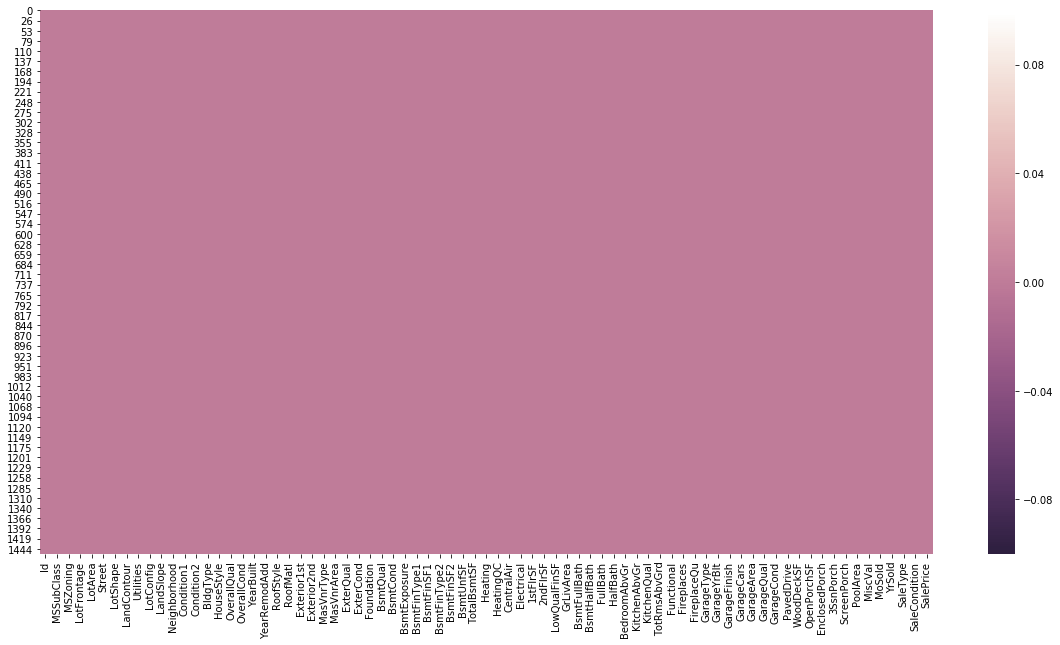

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

### Start of Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

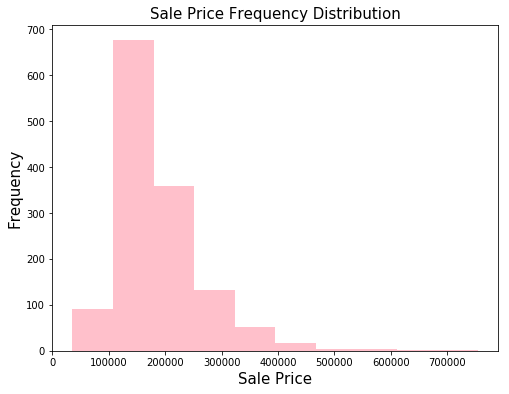

In [13]:
# Sale Price Frequency Distribution
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution", fontsize=15)
plt.hist(housepricesdata["SalePrice"], color= "pink")
plt.show()

/Users/Dippies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


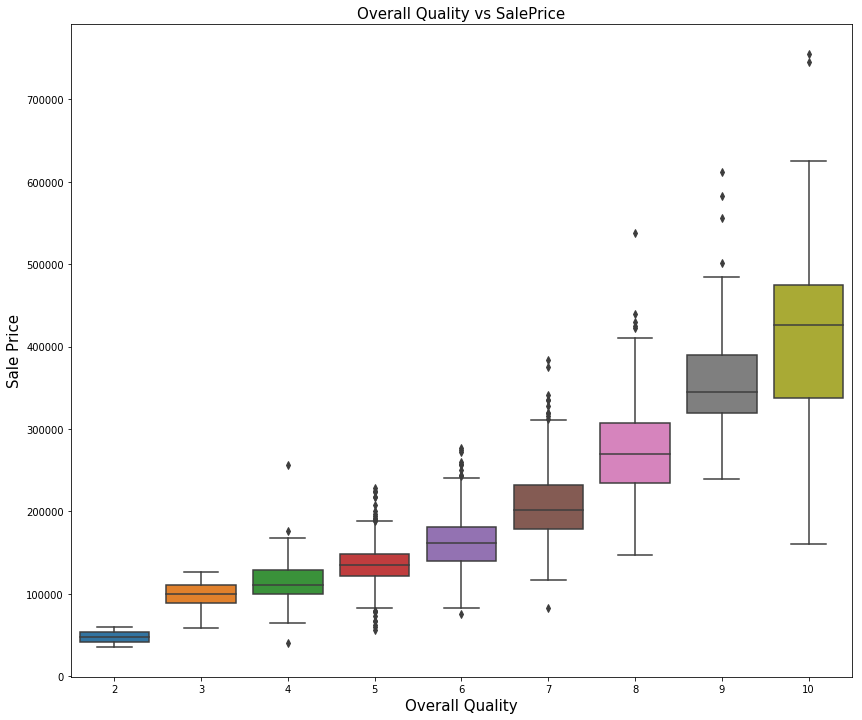

In [14]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallQual", data= housepricesdata)
plt.title("Overall Quality vs SalePrice", fontsize=15)
plt.xlabel("Overall Quality", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

/Users/Dippies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


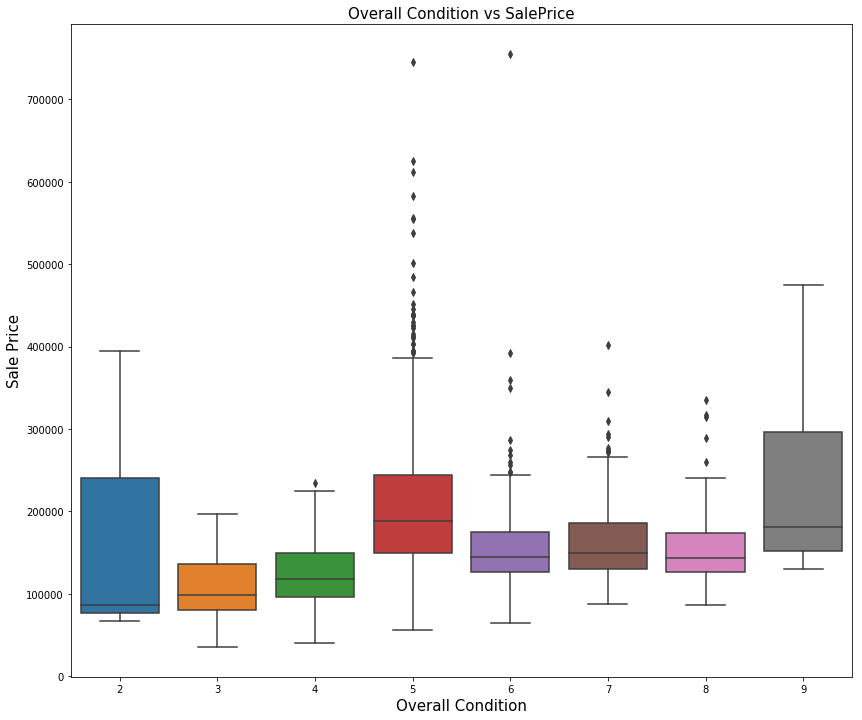

In [15]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallCond", data= housepricesdata)
plt.title("Overall Condition vs SalePrice", fontsize=15)
plt.xlabel("Overall Condition", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

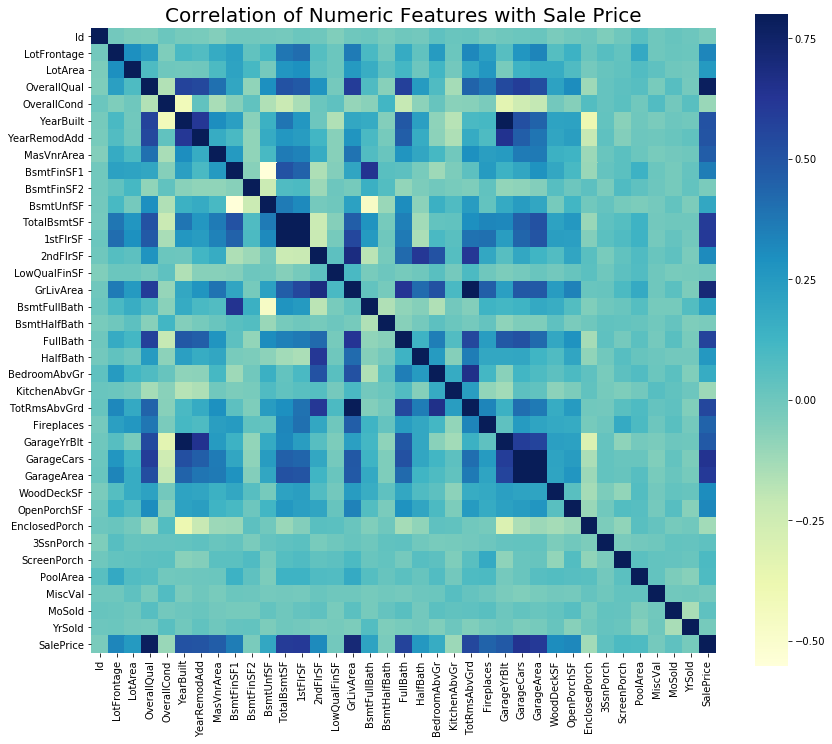

In [16]:
# Get correlation of numeric variables
numeric_features= housepricesdata.select_dtypes(include= [np.number])

correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)
sns.heatmap(correlation, square= True, vmax=0.8, cmap="YlGnBu")

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


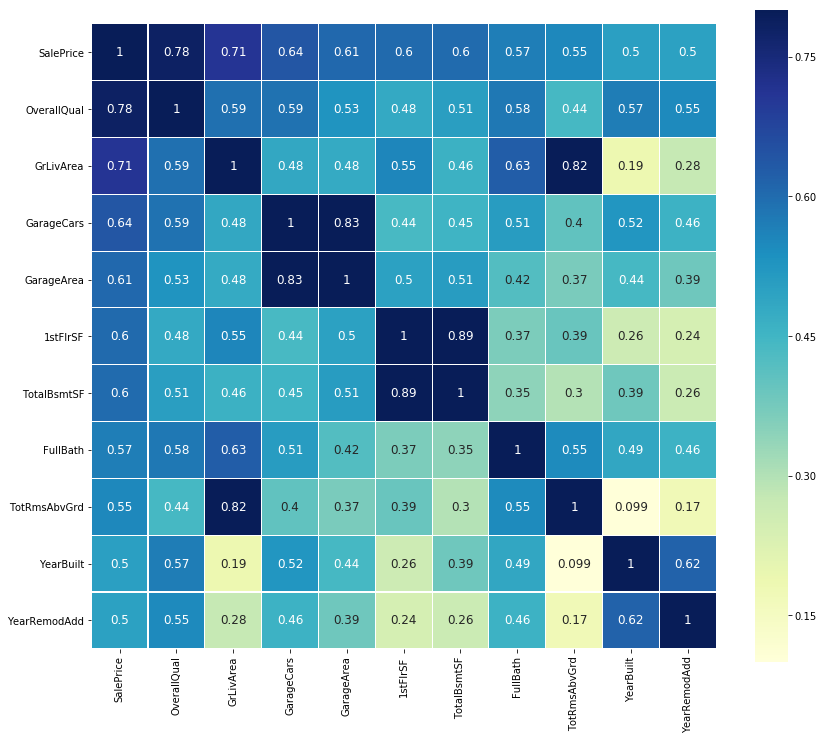

In [17]:
# Zoomed Heat Map
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(housepricesdata[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

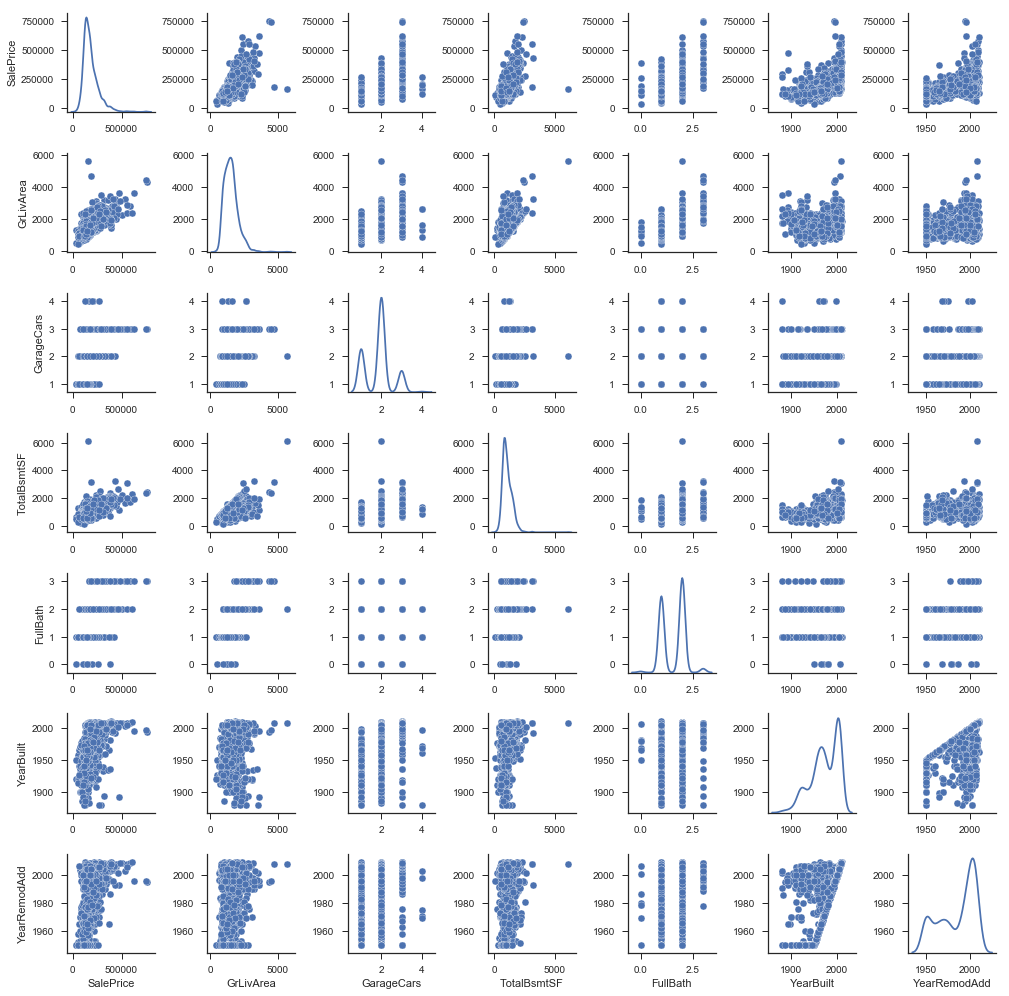

In [18]:
# Pairplot of numeric variables
# Pairplot of numeric variable
sns.set(style="ticks", color_codes=True)
columns= ["SalePrice", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath","YearBuilt", "YearRemodAdd"]
sns.pairplot(housepricesdata[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

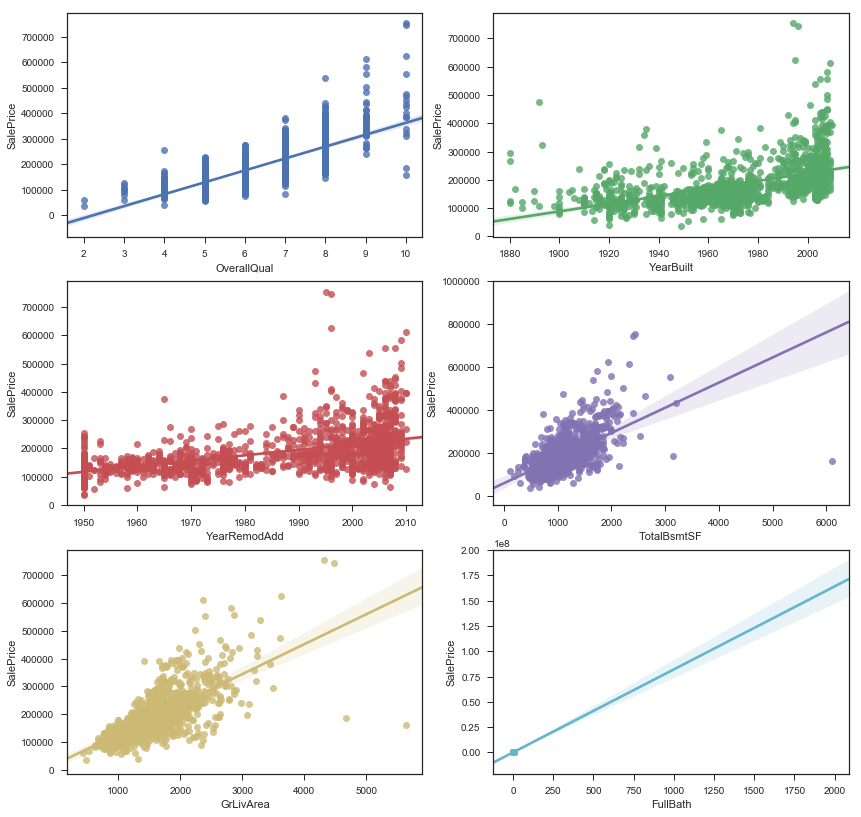

In [19]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,14))

sns.regplot(x=housepricesdata["OverallQual"], y=housepricesdata["SalePrice"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=housepricesdata["YearBuilt"], y=housepricesdata["SalePrice"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=housepricesdata["YearRemodAdd"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=housepricesdata["TotalBsmtSF"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=housepricesdata["GrLivArea"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=housepricesdata["FullBath"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax6)

# sns.regplot(x=train["GarageCars"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax7)

plt.show()
